In [1]:
import pre
import numpy as np
import scipy.fftpack as fftpack
import pylab as pl
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import csv

In [3]:
def show(ori_func, ft, sampling_period = 5): 
    n = len(ori_func) 
    interval = sampling_period / n 
    # 绘制原始函数
    plt.subplot(2, 1, 1) 
    plt.plot(np.arange(0, sampling_period, interval), ori_func, 'black') 
    plt.xlabel('Time'), plt.ylabel('Amplitude') 
    # 绘制变换后的函数
    plt.subplot(2,1,2) 
    frequency = np.arange(n / 2) / (n * interval) 
    nfft = abs(ft[range(int(n / 2))] / n ) 
    print(type(nfft))
    plt.plot(frequency, nfft, 'red') 
    plt.xlabel('Freq (Hz)'), plt.ylabel('Amp. Spectrum') 
    plt.show()

In [4]:
np.set_printoptions(precision=5, suppress=True)
data=pre.load_cwru("3008.mat")

Loading mat file:/Users/rand/Code/PycharmProjects/vibration_algorithm/bearing_data/cwru/Datafiles/3008.mat


In [5]:
sr=12*1000

In [6]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Tue Nov 07 18:50:08 2000',
 '__version__': '1.0',
 '__globals__': [],
 'X051_DE_time': array([[-6.55841],
        [ 4.06168],
        [ 7.6131 ],
        ...,
        [-3.31542],
        [-0.59652],
        [ 3.86148]])}

In [7]:
X=data['X051_DE_time']

In [8]:
length=len(X)

In [9]:
lst_x=[]
for x in X:
    lst_x.append(x[0])

In [10]:
X=pd.Series(lst_x)

In [11]:
import sys

In [12]:
import os

In [13]:
sys.path.append("/Users/rand/Code/PycharmProjects/vibration_algorithm/")

In [14]:
from data_index import index

In [15]:
v = index.acc_to_v_with_bonferroni(X)

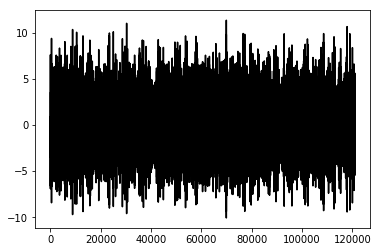

In [16]:
plt.plot(range(0,length),X,'black')

In [17]:
s = index.v_to_movement_with_bonferroni(v)

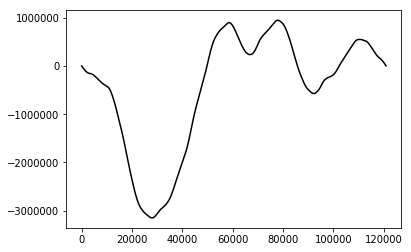

In [18]:
plt.plot(range(0,length),s,'black')

In [19]:
f = np.fft.fft(X)

<class 'numpy.ndarray'>


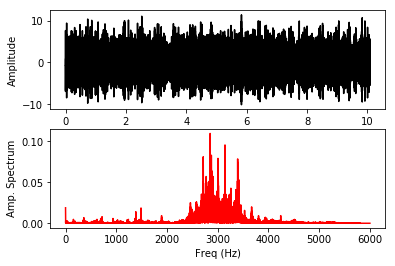

In [20]:
show(X[:-2],f,sampling_period=len(X)/12000)

In [29]:
f2= index.fft(X,sampling_rate=12000)

In [30]:
type(f2)

pandas.core.frame.DataFrame

In [31]:
f2

,HZ,AMP
0,0.000000,0.018957
1,0.099187,0.001742
2,0.198373,0.005792
3,0.297560,0.002945
4,0.396747,0.006291
5,0.495933,0.007047
6,0.595120,0.005576
7,0.694307,0.003818
8,0.793493,0.001282
9,0.892680,0.003105


<class 'numpy.ndarray'>


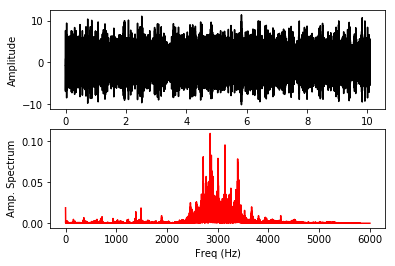

In [32]:
show(X,np.fft.fft(X),sampling_period=len(X)/12000)

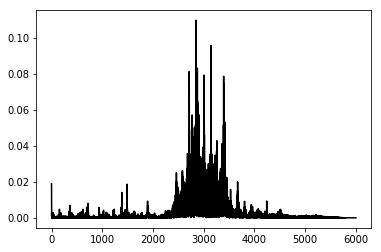

In [33]:
plt.plot(f2['HZ'],f2['AMP'],'black')